# Problem Description

In an effort to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

The main goal of this study is to prevent accidents when conditions are bad, that’s why this model is meant to alert drivers to remind them to be a little bit more careful, to switch roads or postpone their car rides.

There is another possible targeted audience for this study, the local police, health institutes, insurance companies etc. They can make good use of this model to know when to be fully ready to receive bad news about a specific road, and more importantly take prevention measures to avoid accidents on certain ones.

# Discssion of the Background

In most cases, carelessness while driving, using drugs and alcohol or driving too fast are some of the main causes of accidents that can be avoided by implementing stronger regulations.

Besides the above reasons, weather, visibility or road conditions are the major uncontrollable factors which can be avoided by uncovering patterns hidden in the data and declaring a warning to local government, police and drivers on the roads. targeted routes, or alerting the drivers before the road trips.

# Data Understanding

Source of the data:

The data used in this project is the example dataset provided in the capstone project, including all types of collisions. Here is the metadata for the dataset.

It concerns the city of Seattle, WA. It is provided by SPD and recorded by Traffic Records, with a time frame of: 2004 to Present.
Description of the data:

The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 4.

Severity codes are as follows:

0: Little to no Probability (Clear Conditions)

1: Very Low Probability — Chance or Property Damage

2: Low Probability — Chance of Injury

3: Mild Probability — Chance of Serious Injury

4: High Probability — Chance of Fatality

Furthermore, because of the existence of a huge unbalance in some attributes occurrences and the existence of null values in some records, the data needs to be preprocessed, cleaned and balanced before any further processing.

# How the data will be used to solve the problem

We have to select the most important features to weigh the severity of accidents in Seattle. Among all the features, the following features have the most influence in the accuracy of the predictions:

The ‘WEATHER’, ‘ROADCOND’ and ‘LIGHTCOND’ attributes.

In [1]:
import pandas as pd
import numpy as np

## Data Import from weblink

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Check for missing values

In [5]:
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Check for balance

In [6]:
print(df['SEVERITYCODE'].value_counts())

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


#### Here it can be seen that there is a huge imbalance in the data set

## Counting Feature Values

In [7]:
print(df['WEATHER'].value_counts())

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


In [8]:
print(df['ROADCOND'].value_counts())

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64


In [9]:
print(df['LIGHTCOND'].value_counts())

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


## Resampling - Down sampling the data to only 58188 of each class

In [10]:
from sklearn.utils import resample

df_maj = df[df.SEVERITYCODE == 1]
df_min = df[df.SEVERITYCODE == 2]

df_sample = resample(df_maj, replace=False, n_samples=58188, random_state=123)
df = pd.concat([df_sample, df_min])

df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

## Converting

In [11]:
df = df.astype({"WEATHER":'category', "ROADCOND":'category', "LIGHTCOND":'category'})
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
25055,1,-122.292730,47.719265,29626,43684,43684,1778514,Matched,Intersection,36599.0,...,Wet,Dark - Street Lights On,NaN,5022026.0,NaN,10,Entering at angle,0,0,N
65280,1,-122.329124,47.608658,71557,84514,84514,2623093,Matched,Intersection,29926.0,...,Dry,Daylight,NaN,8235027.0,NaN,10,Entering at angle,0,0,N
86292,1,-122.292434,47.733753,94574,110476,110476,3377452,Matched,Intersection,35987.0,...,Unknown,Unknown,NaN,10323017.0,NaN,10,Entering at angle,0,0,N
155111,1,NaN,NaN,172907,222604,222884,E554578,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
64598,1,-122.339185,47.625594,70842,84273,84273,2898917,Matched,Block,NaN,...,Dry,Daylight,NaN,8069016.0,NaN,30,From opposite direction - all others,0,0,N


## Label Encoding

In [12]:
df["WEATHER_c"] = df["WEATHER"].cat.codes
df["ROADCOND_c"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_c"] = df["LIGHTCOND"].cat.codes
Feature = df[['WEATHER','ROADCOND','LIGHTCOND','WEATHER_c','ROADCOND_c','LIGHTCOND_c']]
X = np.asarray(Feature[['WEATHER_c','ROADCOND_c','LIGHTCOND_c']])

In [14]:
X[0:]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       ...,
       [ 1,  0,  5],
       [ 1,  0,  5],
       [ 1,  0,  6]], dtype=int8)

In [15]:
y = df['SEVERITYCODE'].values
y[0:]

array([1, 1, 1, ..., 2, 2, 2])

## Modeling

In [16]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       ...,
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.97854582]])

## Splitting Data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Test set shape: ', X_test.shape, y_test.shape)
print('Training set shape: ', X_train.shape, y_train.shape)

Test set shape:  (34913, 3) (34913,)
Training set shape:  (81463, 3) (81463,)


## Building Models

### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
k = 24
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh_pred = neigh.predict(X_test)
neigh_pred[0:]

array([1, 1, 1, ..., 1, 1, 1])

### KNN Results

In [19]:
from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss
print("F1-Score of KNN is : ", f1_score(y_test, neigh_pred, average='macro'))
print("Jaccard Score of KNN is : ", jaccard_similarity_score(y_test, neigh_pred))

F1-Score of KNN is :  0.477320857528878
Jaccard Score of KNN is :  0.5034227938017357


### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt.fit(X_train, y_train)
pt = dt.predict(X_test)
pt[0:]

array([2, 2, 2, ..., 2, 2, 2])

### Results

In [21]:
print("F1-Score of Decision Tree is : ", f1_score(y_test, pt, average='macro'))
print("Jaccard Score of Decision Tree is : ", jaccard_similarity_score(y_test, pt))

F1-Score of Decision Tree is :  0.5461236640287584
Jaccard Score of Decision Tree is :  0.5682410563400453


### Logistics Regression

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LRpred = LR.predict(X_test)
LRprob = LR.predict_proba(X_test)
LRpred[0:]

array([2, 2, 2, ..., 2, 2, 2])

### Results

In [23]:
print("F1-Score of Logistic Regression is : ", f1_score(y_test, LRpred, average='macro'))
print("Jaccard Score of Logistic Regression is : ", jaccard_similarity_score(y_test, LRpred))
print("LogLoss of Logistic Regression is : ", log_loss(y_test, LRprob))

F1-Score of Logistic Regression is :  0.5159687304684568
Jaccard Score of Logistic Regression is :  0.5309197147194454
LogLoss of Logistic Regression is :  0.6840867853877896


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Confusion Matrix & Plotting

Confusion matrix, without normalization
[[ 6200 11111]
 [ 5266 12336]]


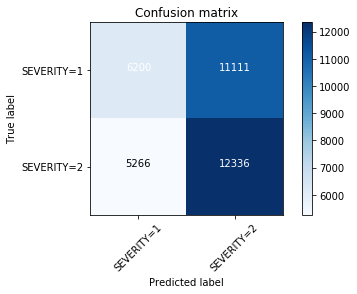

In [25]:
cnf_matrix = confusion_matrix(y_test, LRpred, labels=[1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITY=1','SEVERITY=2'],normalize= False,  title='Confusion matrix')

In [26]:
print (classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           1       0.54      0.36      0.43     17311
           2       0.53      0.70      0.60     17602

   micro avg       0.53      0.53      0.53     34913
   macro avg       0.53      0.53      0.52     34913
weighted avg       0.53      0.53      0.52     34913



## Based on the results, Decision tree is the best model to predict car accident severity

# Conclusion: Based on historical data from the collision in Seattle, we can conclude that particular weather, road and light conditions have an impact on whether or not the car ride could result in one of the two classes property damage (class 1) or injury (class 2).